# 📊 Nigeria Renewable Energy Analysis Project
---
This notebook loads, analyzes, and visualizes Nigeria's renewable energy data step-by-step with **pandas** and **matplotlib**.

## 1️⃣ Load Dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('nigeria_renewable_energy.csv')
df.head()

,Year,Solar_Generation_MWh,Wind_Generation_MWh,Hydro_Generation_MWh,Total_Consumption_MWh,Population,Installed_Capacity_MW
0,2018,200,150,500,900,195000000,2000
1,2019,260,180,520,1000,200000000,2200
2,2020,340,220,550,1080,206000000,2300
3,2021,420,270,580,1200,211000000,2500
4,2022,500,320,600,1350,216000000,2700


## 2️⃣ Inspect Dataset

In [10]:
print('🔍 FIRST 5 ROWS:')
print(df.head())

print('\nℹ️ DATA INFO:')
print(df.info())

print('\n📊 STATISTICS SUMMARY:')
print(df.describe())

🔍 FIRST 5 ROWS:
   Year  Solar_Generation_MWh  Wind_Generation_MWh  Hydro_Generation_MWh  \
0  2018                   200                  150                   500   
1  2019                   260                  180                   520   
2  2020                   340                  220                   550   
3  2021                   420                  270                   580   
4  2022                   500                  320                   600   

   Total_Consumption_MWh  Population  Installed_Capacity_MW  
0                    900   195000000                   2000  
1                   1000   200000000                   2200  
2                   1080   206000000                   2300  
3                   1200   211000000                   2500  
4                   1350   216000000                   2700  

ℹ️ DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                 Non-Null Cou

## 3️⃣ Create New Columns

In [11]:
df['Total_Renewable_MWh'] = df['Solar_Generation_MWh'] + df['Wind_Generation_MWh'] + df['Hydro_Generation_MWh']
df['PerCapita_Consumption_kWh'] = df['Total_Consumption_MWh'] * 1000 / df['Population']
df[['Year', 'Total_Renewable_MWh', 'PerCapita_Consumption_kWh']]

,Year,Total_Renewable_MWh,PerCapita_Consumption_kWh
0,2018,850,0.004615
1,2019,960,0.005000
2,2020,1110,0.005243
3,2021,1270,0.005687
4,2022,1420,0.006250


## 4️⃣ Yearly Growth Calculations

In [12]:
df['Solar_Growth_%'] = df['Solar_Generation_MWh'].pct_change() * 100
df['Wind_Growth_%'] = df['Wind_Generation_MWh'].pct_change() * 100
df['Hydro_Growth_%'] = df['Hydro_Generation_MWh'].pct_change() * 100

df[['Year','Solar_Growth_%','Wind_Growth_%','Hydro_Growth_%']]

,Year,Solar_Growth_%,Wind_Growth_%,Hydro_Growth_%
0,2018,NaN,NaN,NaN
1,2019,30.000000,20.000000,4.000000
2,2020,30.769231,22.222222,5.769231
3,2021,23.529412,22.727273,5.454545
4,2022,19.047619,18.518519,3.448276


## 5️⃣ Filtering & Sorting

In [13]:
highest_solar_year = df.loc[df['Solar_Generation_MWh'].idxmax(), 'Year']
print(f'🌞 Highest Solar Generation Year: {highest_solar_year}')

df['Renewable_Share_%'] = df['Total_Renewable_MWh'] / df['Total_Consumption_MWh'] * 100
above_50 = df[df['Renewable_Share_%'] > 50]
print('\n⚡ Years where renewables > 50% of consumption:')
print(above_50[['Year', 'Renewable_Share_%']])

🌞 Highest Solar Generation Year: 2022

⚡ Years where renewables > 50% of consumption:
   Year  Renewable_Share_%
0  2018          94.444444
1  2019          96.000000
2  2020         102.777778
3  2021         105.833333
4  2022         105.185185


## 6️⃣ Visualization

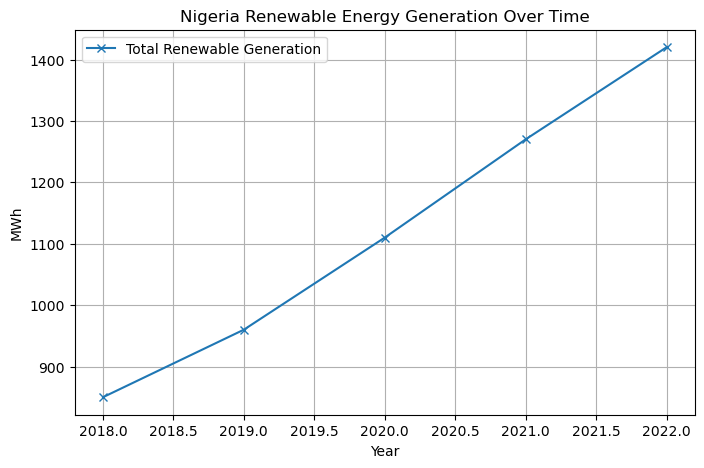

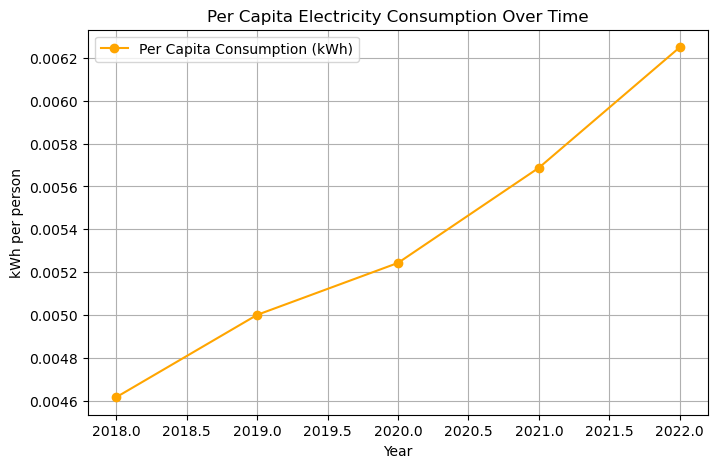

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(df['Year'], df['Total_Renewable_MWh'], marker='x', label='Total Renewable Generation')
plt.xlabel('Year')
plt.ylabel('MWh')
plt.title('Nigeria Renewable Energy Generation Over Time')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(df["Year"], df["PerCapita_Consumption_kWh"], marker="o", color="orange", label="Per Capita Consumption (kWh)")
plt.xlabel("Year")
plt.ylabel("kWh per person")
plt.title("Per Capita Electricity Consumption Over Time")
plt.grid()
plt.legend()
plt.show()


## 7️⃣ Insights

In [8]:
print("\n💡 INSIGHTS:")
fastest_growing = ["Solar", "Wind", "Hydro"]
growth_rates = [df["Solar_Growth_%"].mean(), df["Wind_Growth_%"].mean(), df["Hydro_Growth_%"].mean()]
max_growth = fastest_growing[growth_rates.index(max(growth_rates))]
print(f"- {max_growth} had the highest average growth rate over the years.")
if df["Installed_Capacity_MW"].iloc[-1] < df["Total_Consumption_MWh"].iloc[-1]:
    print("- Installed capacity might need to be expanded to meet future demand.")
else:
    print("- Installed capacity is currently keeping up with consumption.")


💡 INSIGHTS:
- Solar had the highest average growth rate over the years.
- Installed capacity is currently keeping up with consumption.
